# Introduction to Neural Network classification wtih TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you to to classify something as one thing or another.

A few types of classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification


## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create Circles
x, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [2]:
# Check out features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#Check out the labels 
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now... let's visualize it 

In [4]:
import pandas as pd
circles = pd.DataFrame({"x0": x[:, 0], "x1": x[:, 1], "label":y })
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


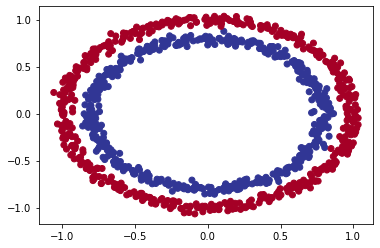

In [5]:
 # Visualize with the plot
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap= plt.cm.RdYlBu)

## Input and output shapes

In [6]:
#check the shapes of our features and labels 
x.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working with 
len(x), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling


In [9]:
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

# fit the model 
model_1.fit(x,y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 0s 374us/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 332us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 453us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 405us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 457us/step - loss: 0.6942 - accuracy: 0.4820


In [10]:
# Lets try and train it for longer
model_1.fit(x, y, epochs = 200)
model_1.evaluate(x,y)

Epoch 1/200
32/32 [==============================] - 0s 430us/step - loss: 0.6945 - accuracy: 0.4900
Epoch 2/200
32/32 [==============================] - 0s 436us/step - loss: 0.6942 - accuracy: 0.4960
Epoch 3/200
32/32 [==============================] - 0s 561us/step - loss: 0.6947 - accuracy: 0.4470
Epoch 4/200
32/32 [==============================] - 0s 430us/step - loss: 0.6941 - accuracy: 0.4880
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4800
Epoch 6/200
32/32 [==============================] - 0s 406us/step - loss: 0.6936 - accuracy: 0.5050
Epoch 7/200
32/32 [==============================] - 0s 405us/step - loss: 0.6943 - accuracy: 0.4970
Epoch 8/200
32/32 [==============================] - 0s 390us/step - loss: 0.6941 - accuracy: 0.4800
Epoch 9/200
32/32 [==============================] - 0s 423us/step - loss: 0.6940 - accuracy: 0.4830
Epoch 10/200
32/32 [==============================] - 0s 458us/step - loss: 0.6938 - accuracy

32/32 [==============================] - 0s 374us/step - loss: 0.6943 - accuracy: 0.5050
Epoch 82/200
32/32 [==============================] - 0s 374us/step - loss: 0.6941 - accuracy: 0.4690
Epoch 83/200
32/32 [==============================] - 0s 374us/step - loss: 0.6941 - accuracy: 0.4930
Epoch 84/200
32/32 [==============================] - 0s 467us/step - loss: 0.6942 - accuracy: 0.4960
Epoch 85/200
32/32 [==============================] - 0s 383us/step - loss: 0.6939 - accuracy: 0.4930
Epoch 86/200
32/32 [==============================] - 0s 436us/step - loss: 0.6940 - accuracy: 0.4880
Epoch 87/200
32/32 [==============================] - 0s 374us/step - loss: 0.6942 - accuracy: 0.4720
Epoch 88/200
32/32 [==============================] - 0s 425us/step - loss: 0.6944 - accuracy: 0.4470
Epoch 89/200
32/32 [==============================] - 0s 360us/step - loss: 0.6945 - accuracy: 0.4720
Epoch 90/200
32/32 [==============================] - 0s 371us/step - loss: 0.6941 - accuracy: 

32/32 [==============================] - 0s 374us/step - loss: 0.6943 - accuracy: 0.4880
Epoch 161/200
32/32 [==============================] - 0s 436us/step - loss: 0.6942 - accuracy: 0.4770
Epoch 162/200
32/32 [==============================] - 0s 395us/step - loss: 0.6943 - accuracy: 0.4920
Epoch 163/200
32/32 [==============================] - 0s 455us/step - loss: 0.6946 - accuracy: 0.4690
Epoch 164/200
32/32 [==============================] - 0s 374us/step - loss: 0.6943 - accuracy: 0.4610
Epoch 165/200
32/32 [==============================] - 0s 405us/step - loss: 0.6939 - accuracy: 0.4970
Epoch 166/200
32/32 [==============================] - 0s 405us/step - loss: 0.6942 - accuracy: 0.4800
Epoch 167/200
32/32 [==============================] - 0s 390us/step - loss: 0.6948 - accuracy: 0.4930
Epoch 168/200
32/32 [==============================] - 0s 436us/step - loss: 0.6941 - accuracy: 0.4690
Epoch 169/200
32/32 [==============================] - 0s 362us/step - loss: 0.6940 - a

[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it is guessing

so let's step things up a notch and add an extra layer.

In [11]:
tf.random.set_seed(42)

# 1. Create the model, this time with 2 layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_2.compile( loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.SGD(),
                 metrics = ['accuracy'])

# 3. Fit the model
model_2.fit(x,y, epochs = 100, verbose= 0)

In [12]:
model_2.evaluate(x, y)

32/32 [==============================] - 0s 395us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

### Improving our Model

Let's look into our bag of tricks to see how we can improve our model .

1. Create a model - we might add more layer or increase
2. Compiling a model = here we might want to choose different optimization function such as Adam instead of SGD.
3. Fitting the model - perhaps we fit our model for more epochs

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(100))
model_3.add(tf.keras.layers.Dense(10)),
model_3.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics =['accuracy'])

# 3. Fit the model
model_3.fit(x,y, epochs = 100, verbose= 0)

In [14]:
# Let's evaluate our model
model_3.evaluate(x,y)

32/32 [==============================] - 0s 391us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980252861976624, 0.5080000162124634]

In [15]:
 model_3.predict(x)

array([[0.4879331 ],
       [0.55887413],
       [0.5629265 ],
       [0.57050604],
       [0.44141006],
       [0.5738814 ],
       [0.5576488 ],
       [0.482467  ],
       [0.4775561 ],
       [0.57502294],
       [0.51484644],
       [0.5308782 ],
       [0.56437737],
       [0.45787287],
       [0.4505265 ],
       [0.46129733],
       [0.5405553 ],
       [0.46380743],
       [0.5479779 ],
       [0.5037538 ],
       [0.50630516],
       [0.5877541 ],
       [0.45902225],
       [0.49123386],
       [0.58321416],
       [0.5704235 ],
       [0.55239445],
       [0.46317366],
       [0.45773247],
       [0.4544093 ],
       [0.47871968],
       [0.5785606 ],
       [0.55546176],
       [0.4633922 ],
       [0.45848906],
       [0.5898657 ],
       [0.57247263],
       [0.52974474],
       [0.458704  ],
       [0.51093006],
       [0.49993864],
       [0.5463095 ],
       [0.5109874 ],
       [0.45797256],
       [0.5223242 ],
       [0.5388774 ],
       [0.44872168],
       [0.544

To visualize our models prediction, let's create a function `plot_decision_boundary`, this function will:

* Take in a trained model, feature (x) and labels (y)
* Create a meshgridof the different x values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones(where each unique class falls) 

In [16]:
import numpy as np

def plot_decision_boundary(model, x, y):
    """
    Plots the decision boundary created by a model predicting on x
    """
    # Define the axis boundaries of the plot and create a meshgrid 
    x_min, x_max =  x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]#stack 2d array together
                
    # Make Predcitions
    y_pred = model.predict(x_in)
                
    # Check for mulit-class
    if len(y_pred[0]) >1:
        print("doing multiclass classifications")
        # we have to reshape our predicitions to get them ready for plotting 
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
                 
    

doing binary classification


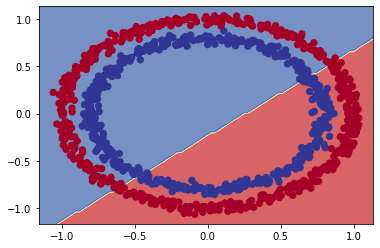

In [17]:
# Check out the predicitions our model is making
plot_decision_boundary(model= model_3,
                       x=x,
                       y=y)

In [18]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
tf.keras.layers.Dense(1, activation = tf.keras.activations.linear )
])

# 2. Compile the model
model_4.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr= 0.01),
                metrics =['accuracy'])

# 3. Fit the model
model_4.fit(x,y, epochs = 100,)

Epoch 1/100
32/32 [==============================] - 0s 405us/step - loss: 3.6463 - accuracy: 0.4630
Epoch 2/100
32/32 [==============================] - 0s 374us/step - loss: 1.5734 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 363us/step - loss: 0.8241 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 358us/step - loss: 0.7819 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 374us/step - loss: 0.7589 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 368us/step - loss: 0.7423 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 374us/step - loss: 0.7305 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 359us/step - loss: 0.7206 - accuracy: 0.4900
Epoch 9/100
32/32 [==============================] - 0s 345us/step - loss: 0.7136 - accuracy: 0.4920
Epoch 10/100
32/32 [==============================] - 0s 374us/step - loss: 0.7080 - accura

32/32 [==============================] - 0s 374us/step - loss: 0.6946 - accuracy: 0.5330
Epoch 82/100
32/32 [==============================] - 0s 374us/step - loss: 0.6945 - accuracy: 0.4720
Epoch 83/100
32/32 [==============================] - 0s 343us/step - loss: 0.6940 - accuracy: 0.4750
Epoch 84/100
32/32 [==============================] - 0s 374us/step - loss: 0.6934 - accuracy: 0.5100
Epoch 85/100
32/32 [==============================] - 0s 437us/step - loss: 0.6940 - accuracy: 0.4990
Epoch 86/100
32/32 [==============================] - 0s 374us/step - loss: 0.6944 - accuracy: 0.4890
Epoch 87/100
32/32 [==============================] - 0s 447us/step - loss: 0.6937 - accuracy: 0.4680
Epoch 88/100
32/32 [==============================] - 0s 445us/step - loss: 0.6940 - accuracy: 0.4670
Epoch 89/100
32/32 [==============================] - 0s 497us/step - loss: 0.6943 - accuracy: 0.4570
Epoch 90/100
32/32 [==============================] - 0s 412us/step - loss: 0.6947 - accuracy: 

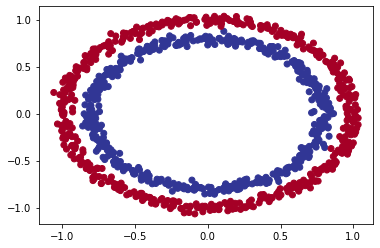

In [19]:
# Check out our data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap= plt.cm.RdYlBu)

doing binary classification


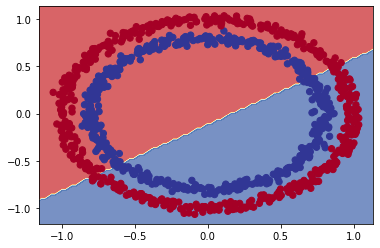

In [20]:
# Checck the decision boundary 
plot_decision_boundary(model_4,
                       x=x,
                       y=y)

In [21]:
 # Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
tf.keras.layers.Dense(4, activation = 'relu'),
tf.keras.layers.Dense(4, activation = 'relu'),
tf.keras.layers.Dense(1, activation = 'sigmoid' )
])

# 2. Compile the model
model_5.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics =['accuracy'])

# 3. Fit the model
model_5.fit(x,y, epochs = 500, verbose=0)

doing binary classification


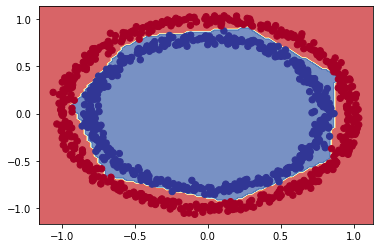

In [22]:
 # Checck the decision boundary 
plot_decision_boundary(model_5,
                       x=x,
                       y=y)

**Note:** The combinations of **linear (straight lines) and non-linear (non-straight) functions** is one of the key fundamentals of neural networks.

Now we've have seen the concept os linear and mon-linear, let's see them in action

In [23]:
# Create a toy tensor (similar to the data we pass in our previous model)
A = tf.cast(tf.range(-10, 10), tf.float16)
A

<tf.Tensor: shape=(20,), dtype=float16, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float16)>

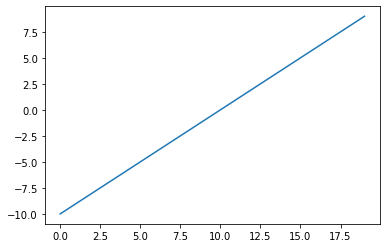

In [24]:
plt.plot(A)

In [25]:
# Let's start by replicating sigmoid - sigmoid(x) = 1/ (1 + exp(-x))
def sigmoid(x):
    return 1/ (1 + tf.exp(-x))

# use the sigmoid on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float16, numpy=
array([4.536e-05, 1.234e-04, 3.355e-04, 9.108e-04, 2.472e-03, 6.695e-03,
       1.799e-02, 4.745e-02, 1.192e-01, 2.688e-01, 5.000e-01, 7.310e-01,
       8.804e-01, 9.526e-01, 9.819e-01, 9.932e-01, 9.971e-01, 9.990e-01,
       1.000e+00, 1.000e+00], dtype=float16)>

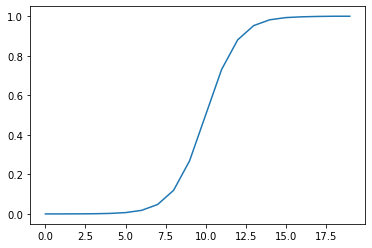

In [26]:
# plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [27]:
# Let's recreate the relu function
def relu(x):
    return tf.maximum(0 ,x)

#pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float16, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float16)>

In [28]:
A

<tf.Tensor: shape=(20,), dtype=float16, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float16)>

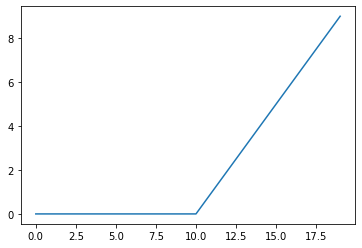

In [29]:
# Plot ReLU - modified tensor
plt.plot(relu(A))

In [30]:
# Let's try the linear activation function
p = tf.keras.activations.linear(A)

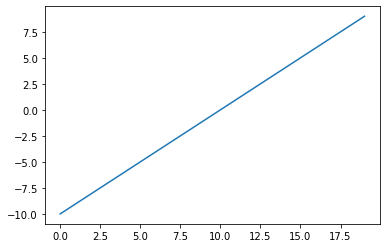

In [31]:
# Does the linear activation function change anything?
plt.plot(p)

In [32]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we've been training and testing on the same dataset..

However, in machine learning this is bascially a sin.

So let's create a training and test set


In [33]:
# Chechk how many examples we have
len(x)

1000

In [39]:
# Split into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [40]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [73]:
# Let's recreate a mdoel to fit on the training data and evbaluate the model on test data

# set the random seed
tf.random.set_seed(42)

#1. Create the model
model_7 = tf.keras.Sequential([
tf.keras.layers.Dense(4, activation = 'relu'),
tf.keras.layers.Dense(4, activation = 'relu'),
tf.keras.layers.Dense(1, activation = 'sigmoid' )
])


# 2. compile the model

model_7.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(lr= 0.01),
               metrics = ['accuracy'])

# 3. Fit the model
history = model_7.fit(x_train,y_train, epochs = 100)


Epoch 1/100
25/25 [==============================] - 0s 479us/step - loss: 0.6824 - accuracy: 0.5638
Epoch 2/100
25/25 [==============================] - 0s 399us/step - loss: 0.6750 - accuracy: 0.5650
Epoch 3/100
25/25 [==============================] - 0s 479us/step - loss: 0.6680 - accuracy: 0.5763
Epoch 4/100
25/25 [==============================] - 0s 456us/step - loss: 0.6635 - accuracy: 0.5725
Epoch 5/100
25/25 [==============================] - 0s 595us/step - loss: 0.6592 - accuracy: 0.5713
Epoch 6/100
25/25 [==============================] - 0s 508us/step - loss: 0.6475 - accuracy: 0.5938
Epoch 7/100
25/25 [==============================] - 0s 556us/step - loss: 0.6312 - accuracy: 0.6275
Epoch 8/100
25/25 [==============================] - 0s 415us/step - loss: 0.6093 - accuracy: 0.6963
Epoch 9/100
25/25 [==============================] - 0s 583us/step - loss: 0.5844 - accuracy: 0.7212
Epoch 10/100
25/25 [==============================] - 0s 510us/step - loss: 0.5442 - accura

25/25 [==============================] - 0s 598us/step - loss: 0.0194 - accuracy: 0.9950
Epoch 82/100
25/25 [==============================] - 0s 463us/step - loss: 0.0189 - accuracy: 0.9962
Epoch 83/100
25/25 [==============================] - 0s 598us/step - loss: 0.0203 - accuracy: 0.9950
Epoch 84/100
25/25 [==============================] - 0s 538us/step - loss: 0.0210 - accuracy: 0.9975
Epoch 85/100
25/25 [==============================] - 0s 438us/step - loss: 0.0192 - accuracy: 0.9975
Epoch 86/100
25/25 [==============================] - 0s 478us/step - loss: 0.0200 - accuracy: 0.9937
Epoch 87/100
25/25 [==============================] - 0s 331us/step - loss: 0.0194 - accuracy: 0.9975
Epoch 88/100
25/25 [==============================] - 0s 439us/step - loss: 0.0184 - accuracy: 0.9962
Epoch 89/100
25/25 [==============================] - 0s 598us/step - loss: 0.0203 - accuracy: 0.9962
Epoch 90/100
25/25 [==============================] - 0s 598us/step - loss: 0.0208 - accuracy: 

In [69]:
# let's evaluate the model
model_7.evaluate(x_test, y_test)

7/7 [==============================] - 0s 427us/step - loss: 0.0536 - accuracy: 0.9800


[0.05362723022699356, 0.9800000190734863]

In [70]:
y_preds = model_7.predict(x_test)

doing binary classification
doing binary classification


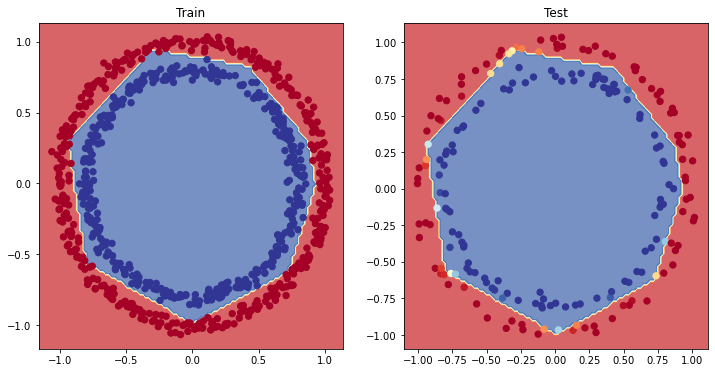

In [71]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_7,x_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_7, x_test, y_preds)
plt.show()


In [63]:
y_test, y_preds

(array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 1], dtype=int64),
 array([[9.9998081e-01],
        [1.2196422e-02],
        [9.9989188e-01],
        [1.9936556e-01],
        [9.3752897e-01],
        [9.9775827e-01],
        [6.4222414e-09],
        [2.4663629e-07],
        [9.9840081e-01],
        [3.1473339e-03],
        [3.9714468e-01],
        [9.9999845e-01],
     

In [72]:
model_7.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


## Plot the loss (or training) curves

In [81]:
# Convert the history object into a DataFrame 
pd.DataFrame(history.history)

,loss,accuracy
0,0.682350,0.56375
1,0.674970,0.56500
2,0.667972,0.57625
3,0.663489,0.57250
4,0.659155,0.57125
...,...,...
95,0.019129,0.99625
96,0.017804,0.99875
97,0.016421,0.99375
98,0.016849,0.99500


Text(0.5, 1.0, 'Model_7 Loss Curves')

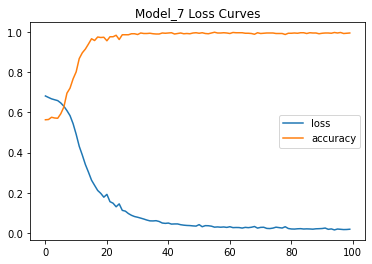

In [82]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title('Model_7 Loss Curves')

**Note:** For Many Problems, the loss functions going down means the model is improving (the predictions it's making are getting to the ground truth labels.)

## Finding the best learning rate

to find the ideal learning rate (the learning rate where the loss decreases the most during trainig) we're going to use the following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its trainig.
* Another model(we could use the same as above, but we're practising building the models here)
* A modified loss curve plot.

In [90]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# 2. complie the model
model_8.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr =0.01),
               metrics =['accuracy'])

# Create a learing rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

# Fit the model
history_8 = model_8.fit(x_train,
                        y_train,
                        epochs = 100,
                        callbacks= [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 358us/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 399us/step - loss: 0.6910 - accuracy: 0.4988
Epoch 3/100
25/25 [==============================] - 0s 439us/step - loss: 0.6903 - accuracy: 0.4975
Epoch 4/100
25/25 [==============================] - 0s 598us/step - loss: 0.6897 - accuracy: 0.5075
Epoch 5/100
25/25 [==============================] - 0s 558us/step - loss: 0.6888 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 439us/step - loss: 0.6881 - accuracy: 0.5075
Epoch 7/100
25/25 [==============================] - 0s 479us/step - loss: 0.6873 - accuracy: 0.5050
Epoch 8/100
25/25 [==============================] - 0s 519us/step - loss: 0.6864 - accuracy: 0.5088
Epoch 9/100
25/25 [==============================] - 0s 519us/step - loss: 0.6856 - accuracy: 0.5038
Epoch 10/100
25/25 [==============================] - 0s 519us/step - loss: 0.6849 - accura

25/25 [==============================] - 0s 439us/step - loss: 0.6339 - accuracy: 0.5863
Epoch 82/100
25/25 [==============================] - 0s 479us/step - loss: 0.6542 - accuracy: 0.5487
Epoch 83/100
25/25 [==============================] - 0s 439us/step - loss: 0.6498 - accuracy: 0.5437
Epoch 84/100
25/25 [==============================] - 0s 439us/step - loss: 0.6902 - accuracy: 0.5263
Epoch 85/100
25/25 [==============================] - 0s 439us/step - loss: 0.7201 - accuracy: 0.5275
Epoch 86/100
25/25 [==============================] - 0s 399us/step - loss: 0.7392 - accuracy: 0.4900
Epoch 87/100
25/25 [==============================] - 0s 399us/step - loss: 0.7339 - accuracy: 0.5050
Epoch 88/100
25/25 [==============================] - 0s 399us/step - loss: 0.7135 - accuracy: 0.4900
Epoch 89/100
25/25 [==============================] - 0s 399us/step - loss: 0.7160 - accuracy: 0.4975
Epoch 90/100
25/25 [==============================] - 0s 399us/step - loss: 0.7182 - accuracy: 

<AxesSubplot:xlabel='epochs'>

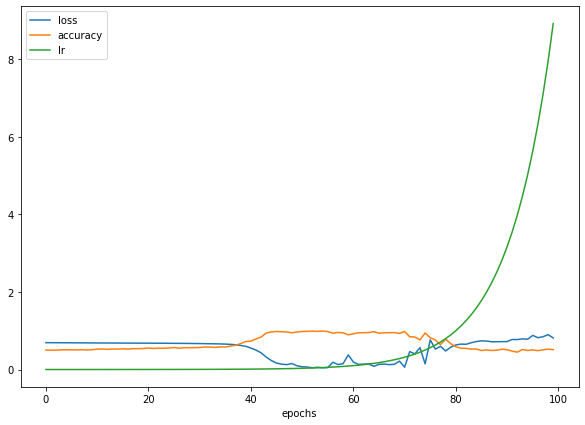

In [93]:
# Chechkout the history
pd.DataFrame(history_8.history).plot(figsize = (10,7) , xlabel = 'epochs')

Text(0.5, 1.0, 'learning rate vs. loss')

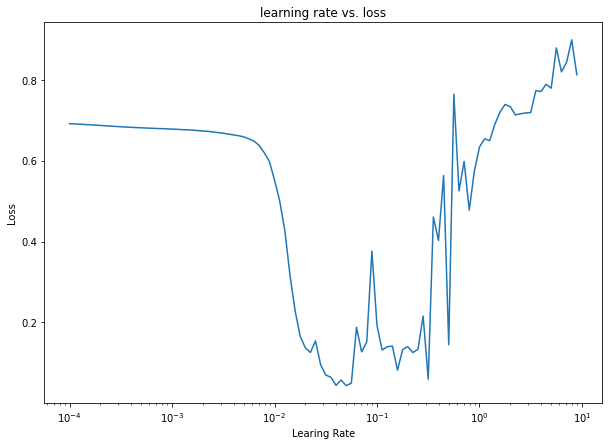

In [100]:
# Plot the learning rate vs. the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_8.history['loss'] )
plt.xlabel('Learing Rate')
plt.ylabel('Loss')
plt.title('learning rate vs. loss')

In [102]:
# Example of other learing rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [106]:
# Lets try using a higher ideal learning rate with the same model as before

tf.random.set_seed(42)

# 1. Create the mdoel
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])

# 2. compile the model
model_9.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr= 0.02),
                metrics = ['accuracy'])

# 3. Fit the model for 20 epochs( 5 less than before)
history_9 = model_9.fit(x_train, y_train, epochs=20 )

Epoch 1/20
25/25 [==============================] - 0s 433us/step - loss: 0.6801 - accuracy: 0.5863
Epoch 2/20
25/25 [==============================] - 0s 402us/step - loss: 0.6694 - accuracy: 0.5888
Epoch 3/20
25/25 [==============================] - 0s 359us/step - loss: 0.6533 - accuracy: 0.6075
Epoch 4/20
25/25 [==============================] - 0s 359us/step - loss: 0.6342 - accuracy: 0.6475
Epoch 5/20
25/25 [==============================] - 0s 446us/step - loss: 0.5787 - accuracy: 0.7200
Epoch 6/20
25/25 [==============================] - 0s 439us/step - loss: 0.5361 - accuracy: 0.7500
Epoch 7/20
25/25 [==============================] - 0s 439us/step - loss: 0.4275 - accuracy: 0.8662
Epoch 8/20
25/25 [==============================] - 0s 479us/step - loss: 0.3479 - accuracy: 0.9137
Epoch 9/20
25/25 [==============================] - 0s 439us/step - loss: 0.2778 - accuracy: 0.9350
Epoch 10/20
25/25 [==============================] - 0s 479us/step - loss: 0.2362 - accuracy: 0.9538

In [108]:
# Evaluate mdoel_10 on the test dataset
model_9.evaluate(x_test, y_test)

7/7 [==============================] - 0s 426us/step - loss: 0.2150 - accuracy: 0.9100


[0.21504615247249603, 0.9100000262260437]

doing binary classification
doing binary classification


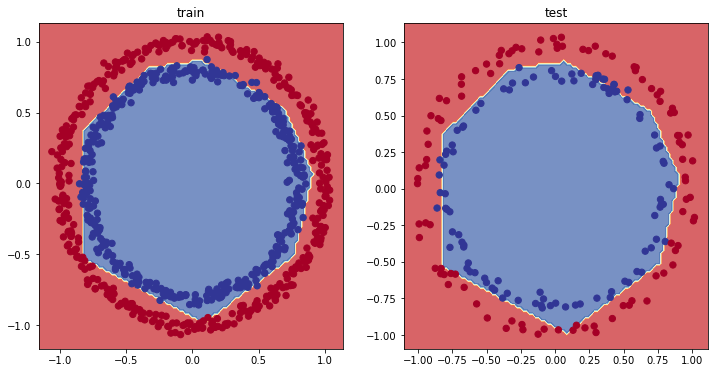

In [109]:
# plot the decsion boundaries for the training and test data
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_9, x_train, y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_9, x_test, y_test)
plt.show()

## More Classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of ither clasification evaluation methods & metrics we should be familiar with:
   
* Accuracy
* Precision
* Recall
* F1- score
* Confusion Matrix
* Classification report (from scikit- learn)

In [111]:
# Check the accuracy of our model
loss, accuracy = model_9.evaluate(x_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set : {(accuracy*100):.2f}')

7/7 [==============================] - 0s 570us/step - loss: 0.2150 - accuracy: 0.9100
Model loss on the test set: 0.21504615247249603
Model accuracy on the test set : 91.00


In [116]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

# make predicitons
y_preds = model_9.predict(x_test)

#Create confusion matrix
confusion_matrix(y_test, y_preds)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [113]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [114]:
y_preds[: 10]

array([[9.3463719e-01],
       [8.5691810e-03],
       [9.8140264e-01],
       [9.2464685e-04],
       [6.1867708e-01],
       [6.9378215e-01],
       [4.1252375e-04],
       [1.0053813e-03],
       [9.2127597e-01],
       [5.6455433e-03]], dtype=float32)

Looks like our prediction array comes out in **predicition probability** form.. the standard output from the sigmoid (or softmax) activations functions.

In [117]:
# Convert predicions probabilities to binary format and view confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  1],
       [17, 83]], dtype=int64)

How do we prettify our confusion matrix?

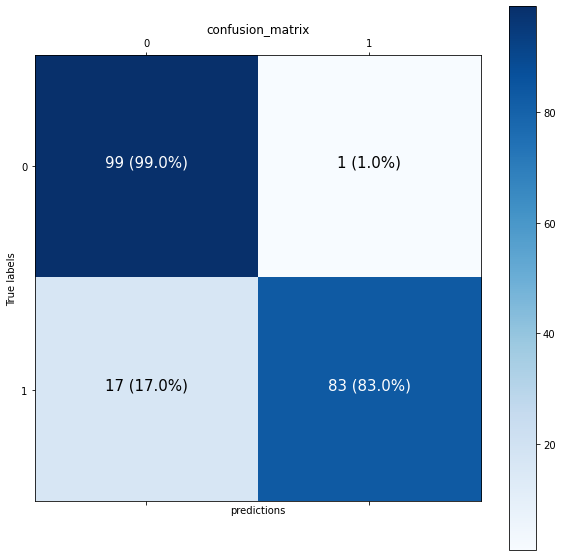

In [129]:
# Note: The confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float')/ cm.sum(axis =1)[:, np.newaxis] #normalize our confusion matrix
n_classes = cm.shape[0]

#Let's prettify 
fig, ax = plt.subplots(figsize = figsize)
cax = ax.matshow(cm, cmap = plt.cm.Blues )
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else :
    labels = np.arange(cm.shape[0])

# labels the axis
ax.set(title = 'confusion_matrix',
        xlabel = 'predictions',
       ylabel = 'True labels',
      xticks = np.arange(n_classes),
      yticks = np.arange(n_classes),
      xticklabels = labels,
      yticklabels = labels)

# set threshold for different colours 
threshold = (cm.max() +cm.min()) /2.

#plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment = "center",
            color ='white' if cm[i, j] > threshold else "black",
            size = 15)

In [124]:
cm_norm

array([[0.99, 0.01],
       [0.17, 0.83]])